Obavezna izmena je podatak "mesec" i ime fajla i sheet-ova

In [46]:
#UNETI MESEC ZA KOJI SE RADI IZVESTAJ U TEKSTUALNOM FORMATU na primer "januar" za novembar
#OBAVEZNA IZMENA
mesec = "januar"
godina = "2025"
#OBAVEZNA IZMENA IMENA IZVORA I SHEETA
ime_fajla = "Odstupanje ravnosti 2025. god.xlsx"
prvi_sheet = 'MT - 2025'
drugi_sheet = 'UTVA - 2025'

In [47]:
import matplotlib.pyplot as plt 
import pandas as pd
import calendar
from datetime import datetime
import math
from tabulate import tabulate
import statistics
import matplotlib.patches as mpatches
from docx import Document
from docx.shared import Inches
import numpy 
from collections import defaultdict
from docx.shared import RGBColor
import matplotlib.lines as mlines
import seaborn as sns

In [48]:
"""
#Provera koji stilovi tabela postoje
from docx import Document
dddd = Document()

for s in dddd.styles:
    print(s.name)
"""

'\n#Provera koji stilovi tabela postoje\nfrom docx import Document\ndddd = Document()\n\nfor s in dddd.styles:\n    print(s.name)\n'

In [49]:
#Cita podatke koje ce analizirati za izvestaj
df_sheetMT = pd.read_excel(ime_fajla, sheet_name = prvi_sheet) 
df_sheetUTVA = pd.read_excel(ime_fajla, sheet_name = drugi_sheet) 

#Tipovi celika i koji celik u koji tip spada
tipovi_celika = ['A', 'B']
tip_A = ['DD11', 'DD13', 'S235JR', 'S235JR+AR', 'S235JRC+AR', 'S235JRC+N', 'S275JR+AR']
tip_B = ['S355J2', 'S355J2+M', 'S355J2+N', 'S355J2C+M', 'S355J2C+N', 'S355JR', 'S355JR+M', 'S355MC', 'S355N', 'S420MC', 'S460MC', 'S500MC', 'P265GH']

In [50]:
#PRVI SHEET MT

#Uzmi sve redove gde je u koloni 'Mesec' trazeni mesec za izvestaj
df_mesecniMT = df_sheetMT[df_sheetMT['Mesec'] == mesec] 
#broj redova za dati mesec
broj_redovaMT = len(df_mesecniMT)

#DRUGI SHEET UTVA

#Uzmi sve redove gde je u koloni 'Mesec' trazeni mesec za izvestaj
df_mesecniUTVA = df_sheetUTVA[df_sheetUTVA['Mesec'] == mesec] 
#broj redova za dati mesec
broj_redovaUTVA = len(df_mesecniUTVA)

redoviUTVA_TTA =  df_mesecniUTVA[df_mesecniUTVA['Vrsta proizvoda'] == 'TTA']
broj_redovaUTVA_TTA = len(redoviUTVA_TTA)
proc_broj_redovaUTVA_TTA = round(broj_redovaUTVA_TTA * 100 / broj_redovaUTVA, 2)

In [51]:
#FAJL U KOME CEMO ISPISIVATI IZVESTAJ
ime_izvestaja = "Mesečni izveštaj " + mesec + " " + godina + ".docx"
doc = Document()

#Podesi željene parametre paragraph formata
style = doc.styles["Normal"]
style.paragraph_format.line_spacing = 1.5  # npr. 1.5 prored

#Upisujemo tekst za izvestaj
naslov = "Mesečni Izveštaj o Ravnosti i Kvalitetu Paketa za Mesec " + mesec + " " + str(datetime.now().year)
doc.add_heading(naslov, level = 1)
doc.add_paragraph("Ukupan broj paketa iz MT obrađenih ovog meseca: " + str(broj_redovaMT) +  " paketa")
doc.add_paragraph(f"Iz UTVA obrađeno je: {broj_redovaUTVA} paketa, od toga {broj_redovaUTVA_TTA} je TTA paketa ({proc_broj_redovaUTVA_TTA}%).")

In [52]:
kvalitet_celika = df_mesecniMT['Kvalitet'].value_counts()
vrste_proizvoda = df_mesecniMT['Vrsta proizvoda'].value_counts()

doc.add_heading("1. Raspodela po kvalitetu čelika:", level = 2)

#Za svaku vrstu celika racuna koji je procenat njegovog pojavljivanja u datom mesecu
procenti_kvaliteta_celika = []
vrste_celika = []
for kljuc, vrednost in kvalitet_celika.items():
    procenat = round(vrednost / broj_redovaMT * 100, 2)
    doc.add_paragraph(f"{kljuc}: {vrednost} paketa ({procenat}%)")   #upisujemo u fajl izvestaja 
    print(f"{kljuc}: {vrednost} paketa ({procenat}%)")
    procenti_kvaliteta_celika.append(procenat)
    vrste_celika.append(kljuc)


run_bold = doc.add_paragraph().add_run("Vrste proizvoda:")
run_bold.bold = True
procenti_vrsta_proizvoda = []
#Racuna koji je procenat pojavljivanja TTA, RTA itd. vrste proizvoda u datom mesecu
for kljuc, vrednost in vrste_proizvoda.items():
    procenat = round(vrednost / broj_redovaMT * 100, 2)
    doc.add_paragraph(f"{kljuc}: {procenat}% paketa")    #upisujemo u fajl izvestaja 
    print(f"{kljuc}: {procenat}% paketa")

#---------------------------------------------------------------------------------------------------------------------------
#mesto za komentar koji se rucno unosi u word-u
run_bold = doc.add_paragraph().add_run(f"KOMENTAR: ")
run_bold.bold = True
run_bold.font.size = Inches(0.2)

S235JRC+N: 850 paketa (22.94%)
S235JR+N: 750 paketa (20.24%)
S235JR+AR: 653 paketa (17.62%)
S355J2C+N: 436 paketa (11.76%)
S355MC: 368 paketa (9.93%)
S355J2+N: 314 paketa (8.47%)
P265GH: 90 paketa (2.43%)
S355J2C+M: 75 paketa (2.02%)
DD11: 71 paketa (1.92%)
S355J2: 31 paketa (0.84%)
DD13: 26 paketa (0.7%)
S355JR: 15 paketa (0.4%)
S355J2+M: 10 paketa (0.27%)
S235JRC+AR: 8 paketa (0.22%)
S235JR: 6 paketa (0.16%)
S460MC: 3 paketa (0.08%)
TTA: 96.65% paketa
RTA: 3.35% paketa


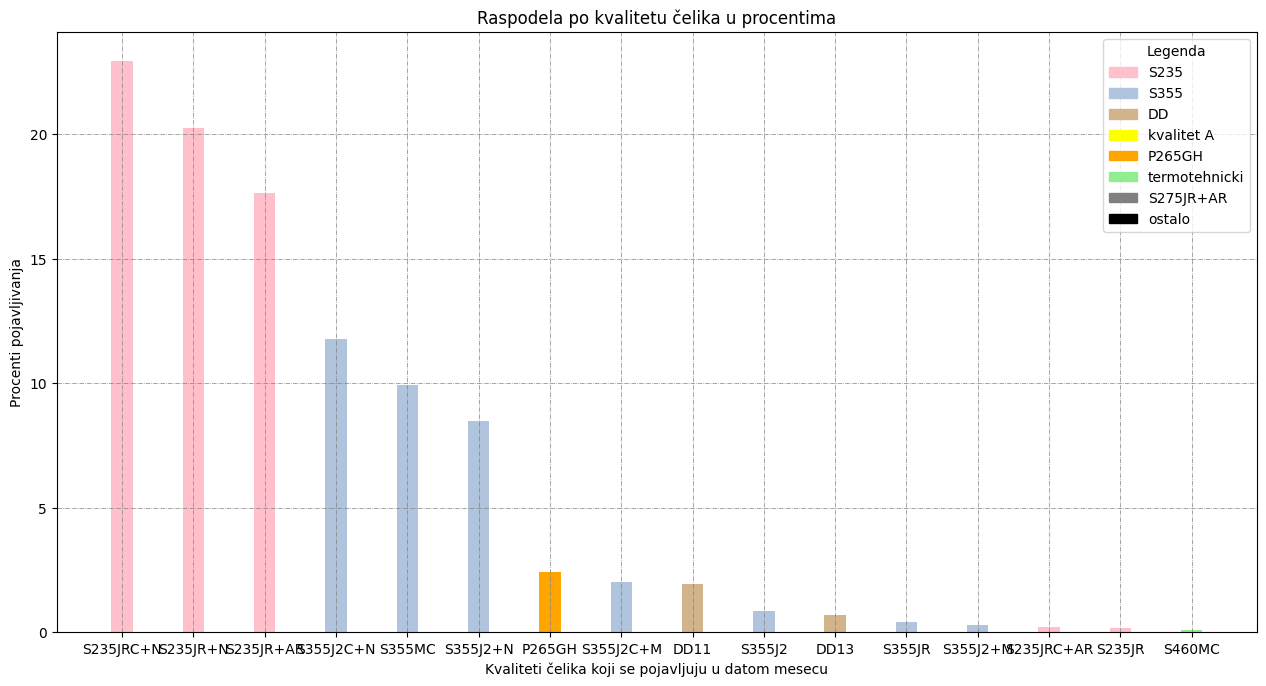

In [53]:
# Prikazivanje grafikona
#plt.figure(figsize=(20, 3))
#plt.bar(labels, procenti_kvaliteta_celika, width=0.3, color = "pink")
#plt.title("Raspodela po kvalitetu čelika u procentima")
#plt.show()

doc.add_paragraph(f"Pogledajmo raspored kvaliteta u sledećem grafiku.")

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
ax.grid(True, color = "grey", linewidth = "0.5", linestyle = "-.")

ax.set_xlabel('Kvaliteti čelika koji se pojavljuju u datom mesecu')
ax.set_ylabel('Procenti pojavljivanja')
ax.set_title('Raspodela po kvalitetu čelika u procentima')

#svaki tip celika bice obojen drugacije boje
colors = ['pink' if lab.startswith('S235') else 
          'lightsteelblue' if lab.startswith('S355') else 
          'tan' if lab.startswith('DD') else 
          'yellow' if lab.startswith('A') else 
          'orange' if lab.startswith('P265GH') else 
          'lightgreen' if lab in ['S420MC', 'S460MC', 'S500MC'] else
          'gray' if lab == 'S275JR+AR' else
          'black'
          for lab in vrste_celika]
#legenda boja
pink_patch = mpatches.Patch(color = 'pink', label = 'S235')
lightsteelblue_patch = mpatches.Patch(color = 'lightsteelblue', label = 'S355')
tan_patch = mpatches.Patch(color = 'tan', label = 'DD')
yellow_patch = mpatches.Patch(color = 'yellow', label = 'kvalitet A')
orange_patch = mpatches.Patch(color = 'orange', label = 'P265GH')
lightgreen_patch = mpatches.Patch(color = 'lightgreen', label = 'termotehnicki')
gray_patch = mpatches.Patch(color = 'gray', label = 'S275JR+AR')
black_patch = mpatches.Patch(color = 'black', label = 'ostalo')
plt.legend(handles = [pink_patch, lightsteelblue_patch, tan_patch, yellow_patch, orange_patch, lightgreen_patch, gray_patch, black_patch], title = "Legenda")

ax.bar(vrste_celika, procenti_kvaliteta_celika, width = 0.3, color = colors)
plt.show()


#cuva grafik u fajl kao sliku
grafik1 = "RaspodelaPoRavnostiProcenti.png"
fig.savefig(grafik1, bbox_inches ='tight')  #drugi argument govori da treba da ukljuci i margine grafika - nazive x i y osa

#onda unosimo sliku grafika u dokument izvestaja
doc.add_picture(grafik1, width = Inches(6.5))

In [54]:
doc.add_heading("2. Analiza ravnosti", level = 2)
doc.add_heading("2.1. Prosek i maksimalne vrednosti ravnosti", level = 3)

In [55]:
ivicna_talasavost = df_mesecniMT['Ivicna talasavost']
centralna_talasavost = df_mesecniMT['Centralna talasavost']
koritavost = df_mesecniMT['Koritavost']
lucnost = df_mesecniMT['Lucnost'] 

#racuniza koja treba za kolonu "Procenat vrednosti vece od nule", broji koliko njih je vece od nule
br_ivicne = sum(1 for x in ivicna_talasavost if x > 0)
br_centralne = sum(1 for x in centralna_talasavost if x > 0)
br_koritavost = sum(1 for x in koritavost if x > 0)
br_lucnost = sum(1 for x in lucnost if x > 0)

procenat_ivicne = round(br_ivicne / len(ivicna_talasavost) * 100, 2)
procenat_centralne = round(br_centralne / len(centralna_talasavost) * 100, 2)
procenat_koritavost = round(br_koritavost / len(koritavost) * 100, 2)
procenat_lucnosti = round(br_lucnost / len(lucnost) * 100, 2)
ukupno = round(procenat_ivicne + procenat_centralne + procenat_koritavost + procenat_lucnosti, 2)

#vrednosti za tabelu
podaci = [
    ("Ivična talasavost",    procenat_ivicne,     round(ivicna_talasavost.mean(), 2),    ivicna_talasavost.max()),
    ("Centralna talasavost", procenat_centralne,  round(centralna_talasavost.mean(), 2), centralna_talasavost.max()), 
    ("Koritavost",           procenat_koritavost, round(koritavost.mean(), 2),           koritavost.max()), 
    ("Lučnost",              procenat_lucnosti,   round(lucnost.mean(), 2),              lucnost.max()),
    ("Ukupno",               ukupno,              "/",                                   "/"  )
]

#---------------------------------------------------------------------------------------------------------------------------
#kreiranje tabele i cuvanje tabele u fajl
#jedan hered red - imena kolona i cetiri kolone
table = doc.add_table(rows = 1, cols = 4)
#Neki primeri za izgled tabele: "LightShading-Accent1", "LightGrid", "ColorfulList-Accent1", "TableGrid", ...
table.style = "Light Grid Accent 1"

#nazivi kolona za tabelu koju cemo da prikazemo
#Popunjavanje imena kolona
hdr_cells = table.rows[0].cells
hdr_cells[0].text = ""
hdr_cells[1].text = "Procenat vrednosti ravnosti vece od nule"
hdr_cells[2].text = "Prosečna vrednost"
hdr_cells[3].text = "Maksimalna vrednost"

#dodavanje podataka u tabelu u odgovarajucim kolonama i redovima
for ime, procenat, prosek, maks in podaci:
    row_cells = table.add_row().cells
    row_cells[0].text = str(ime)
    row_cells[1].text = str(procenat)
    row_cells[2].text = str(prosek)
    row_cells[3].text = str(maks)

table.columns[0].width = Inches(1.5) 

In [56]:
#ovaj deo je bitan pa se formatira: bold + veći font
run_bold = doc.add_paragraph().add_run(f"Ukupni procenat neravnih paketa je {ukupno}%.")
run_bold.bold = True
run_bold.font.size = Inches(0.2)

#doc.add_paragraph(f"Ukupni procenat neravnih paketa je {ukupno}%.")

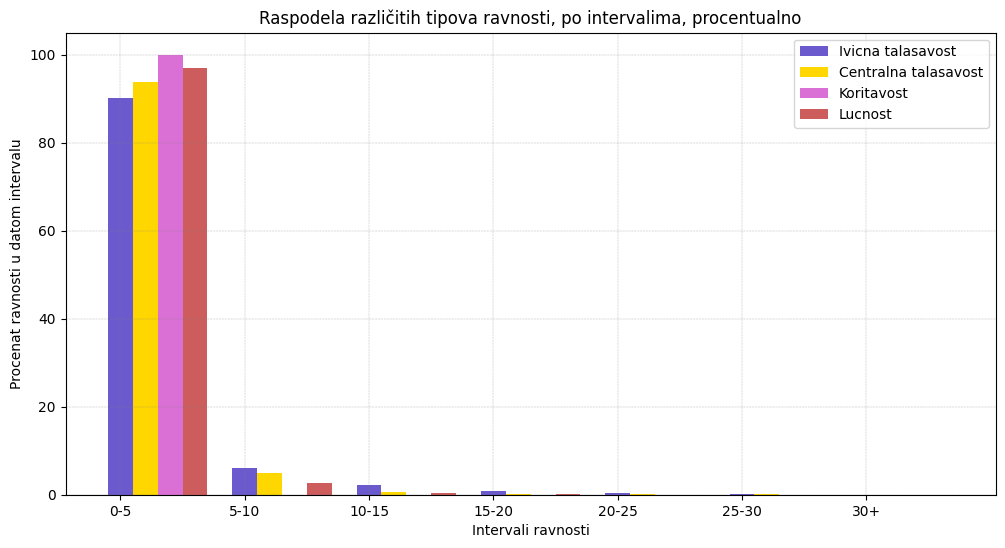

In [57]:
#Kreiranje grafika za talasavosti
#fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes([0,0,1,1])
#ax.grid(True, color = "grey", linewidth = "0.5", linestyle = "-.")

fig, ax = plt.subplots(figsize =(12, 6))
width = 0.2

#ovo su bar-ovi, imacemo ih po 4
labels = ["Ivicna talasavost", "Centralna talasavost", "Koritavost", "Lucnost"]
#ovo su intervali za y osu
intervali = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30+"]

#ovo su podaci za y osu 
svi_podaci = []
#Izdvajamo procente za grafik, za svaki od talasavosti treba da se proveri koliko ih ima u datim segmentima 
for vrsta in labels:
    #raucnam procenat pojavljivanja svih vrsta talasavosti u odnosu na date intervale
    #skracenice za sledece promenljive poticu od "nula do pet" - "np", "dvadeset do dvadeset pet" - dvdvp
    #0-5
    np = round(sum([1 if i <= 5 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    #5-10
    pdd = round(sum([1 if i > 5 and i <= 10 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    #10-15
    dp = round(sum([1 if i > 10 and i <= 15 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    #15-20
    pdv = round(sum([1 if i > 15 and i <= 20 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    #20-25
    dvdvp = round(sum([1 if i > 20 and i <= 25 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    #25-30
    dvpt = round(sum([1 if i > 25 and i <= 30 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    #30+
    t = round(sum([1 if i > 30 else 0 for i in df_mesecniMT[vrsta]]) / broj_redovaMT * 100, 2)
    
    podaci = [np, pdd, dp, pdv, dvdvp, dvpt, t]
    svi_podaci.append(podaci)

#---------------------------------------------------------------------------------------------------------------------------
#boje bar-ova
colors = ['slateblue', 'gold', 'orchid', 'indianred']
i = 0

#pocetak na y osi, gre ce biti nacrtan prvi bar
br = numpy.arange(len(svi_podaci[0]))
#crtamo sve bar-ove
for vrsta in labels:
    plt.bar(br, svi_podaci[i], color = colors[i], width = width, label = vrsta)             
    #svaki sledeci bar se crta malo desno u osnosu na prethodni
    br = [x + width for x in br] 
    i = i + 1

plt.xlabel('Intervali ravnosti') 
plt.ylabel('Procenat ravnosti u datom intervalu') 
ax.set_title('Raspodela različitih tipova ravnosti, po intervalima, procentualno')
ax.set_xticks(numpy.arange(len(intervali))) #to se dodaje da bi lepo posle ispisao label intervala
ax.set_xticklabels(intervali)


ax.grid(True, color = "grey", linewidth = "0.2", linestyle = "-.")
ax.legend()
plt.show()                    

#---------------------------------------------------------------------------------------------------------------------------
#cuva grafik u fajl kao sliku
grafik2 = "RaspodelaRavnostiPoIntervalima.png"
fig.savefig(grafik2, bbox_inches ='tight')  #drugi argument govori da treba da ukljuci i margine grafika - nazive x i y osa

#onda unosimo sliku grafika u dokument izvestaja
doc.add_picture(grafik2, width = Inches(6.5))

#---------------------------------------------------------------------------------------------------------------------------
#mesto za komentar koji se rucno unosi u word-u
run_bold = doc.add_paragraph().add_run(f"KOMENTAR 1: ")
run_bold.bold = True
run_bold.font.size = Inches(0.2)

#mesto za komentar koji se rucno unosi u word-u
run_bold = doc.add_paragraph().add_run(f"KOMENTAR 2: ")
run_bold.bold = True
run_bold.font.size = Inches(0.2)

In [58]:
#Racunamo prekoracenja za ravnost
doc.add_heading("3. Usaglašenost sa dozvoljenim ravnostima", level = 2)

ukupna_ravnost = df_mesecniMT['Ukupna ravnost']
dozvoljena_ravnost = df_mesecniMT['Dozvoljena ravnost']

#podaci koji ispunjavaju uslov, u granicama dozvoljene ravnosti
u_granicama = df_mesecniMT[ukupna_ravnost <= dozvoljena_ravnost]
br_u_granicama = len(u_granicama)
d = "{:.2f}".format(br_u_granicama / broj_redovaMT * 100)

#broj onih koje su izvan dozvoljene ravnosti
br_prekoracenih = broj_redovaMT - br_u_granicama
prekoracene = df_mesecniMT[ukupna_ravnost > dozvoljena_ravnost]
p = "{:.2f}".format(br_prekoracenih / broj_redovaMT * 100)
#---------------------------------------------------------------------------------------------------------------------------
doc.add_paragraph(f"Paketi unutar dozvoljenih granica: {d}% ({br_u_granicama} od {broj_redovaMT})")
doc.add_paragraph(f"Paketi sa prekoračenjem dozvoljenih granica: {p}% ({broj_redovaMT - br_u_granicama} od {broj_redovaMT})")

#izdvaja koji celik ima najveca odstupanja od svih koji su prekoraceni
najvece_prekoracenje = prekoracene['Ukupna ravnost'].max()
najvece_prekoracenje

celik_sa_max_prekoracenjem = prekoracene[prekoracene['Ukupna ravnost'] == najvece_prekoracenje]

#ako ih ima vise odvajam zarezom
celici = celik_sa_max_prekoracenjem['Kvalitet'].values
# Pretvori svaku vrednost u string i spoji ih sa zarezom i razmakom
celici_str = "; ".join(map(str, celici))

doc.add_paragraph(f"Najveća odstupanja zabeležena su kod čelika {celici_str} i dimenzija {celik_sa_max_prekoracenjem['Debljina'].values} x {celik_sa_max_prekoracenjem['Sirina'].values} x {celik_sa_max_prekoracenjem['Duzina'].values} mm.")

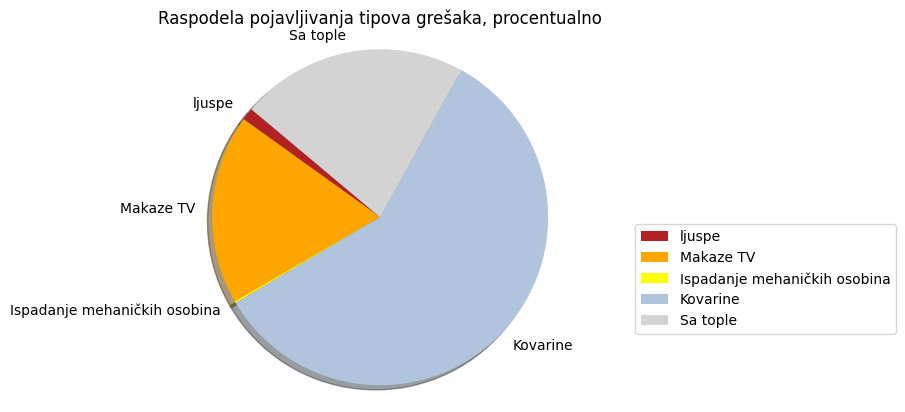

<Figure size 640x480 with 0 Axes>

In [59]:
#Izdvajanje greske iz Napomene

#ako pocinje sa 1... to je greska sa celicane
#ako pocinje sa 250, 255, 258, 267  to je greska sa makaza
#ako pocinje sa 225, 230  to su lose mehanicke osobine
#sve ostalo su greske sa celicane + tople

gr_celicana = 0
gr_makaza = 0
gr_mehanicke_osobine = 0
gr_kovarine = 0
gr_topla = 0
bez_greske = 0
#ovo ce se koristiti posle da se prebroje sve greske koje se pojavljuju kako bismo videli najcescu
greske_napomene = defaultdict(int)

napomena = df_mesecniMT['Napomene']
suma_svih_gresaka = 0
#---------------------------------------------------------------------------------------------------------------------------
#Gledace se svaki red iz excel-a tj svaki paket
#onaj red koji nema ni jednu gresku bice sa elementom ['nan'] i njega brojim u podatku "bez_greske"
#Kada racunam "suma_svih_gresaka" moram na kraju da oduzmem broj bez_greske jer i njih najpre racuna
for nap in napomena:
    #negde u tabeli je podatak tipa float...zato mora jedno konvertovanje u str
    nap = str(nap)
    
    #za svaki red odvajam listu gde su elementi podaci izmedju tacke-zarez, 
    #ali brisem one koji krecu sa R= ili su 'nan' tj red nema ni jednu gresku...
    nap_list = [elem.strip() 
                 for elem in nap.split(";") 
                 if not elem.strip().startswith("R=") and elem.strip() != '']

    #oni redovi bez greske 
    bez_greske = bez_greske + sum([1 if n == 'nan' else 0 for n in nap_list])

    #ovde idu svi redovi - pa cu oduzeti na kraju ove bez_greske
    suma_svih_gresaka = suma_svih_gresaka + len(nap_list)
    
    #za svaku listu, na sve greske sa celicane, dodajem sumu gresaka celicane iz tog reda (koje pocinju sa 1)
    gr_celicana = gr_celicana + sum([1 if n.startswith('1') else 0 for n in nap_list])
    
    #isto za sve ostale greske 
    gr_makaza = gr_makaza + sum([1 if n.startswith('250') 
                                 or n.startswith('255') 
                                 or n.startswith('258') 
                                 or n.startswith('267') else 0 for n in nap_list])
    
    gr_mehanicke_osobine = gr_mehanicke_osobine + sum([1 if n.startswith('225') 
                                                       or n.startswith('230') else 0 for n in nap_list])
    
    gr_kovarine = gr_kovarine + sum([1 if n.startswith('210') 
                                    or n.startswith('211') 
                                    or n.startswith('212')
                                    or n.startswith('213') else 0 for n in nap_list])
    
    #sve ostalo -> posto ih ima mnogo onda gledam sve sto nije ovo od malopre XD 
    gr_topla = gr_topla + sum([1 if not n.startswith('1')
                             and not n.startswith('250') 
                             and not n.startswith('255') 
                             and not n.startswith('258') 
                             and not n.startswith('267') 
                             and not n.startswith('225') 
                             and not n.startswith('230') 
                             and not n.startswith('210') 
                             and not n.startswith('211') 
                             and not n.startswith('212') 
                             and not n.startswith('213') 
                             and n != 'nan'
                             else 0 for n in nap_list])
    #----------------------------
    #a sad brojim te greske koje se pojavljuju kako bih na kraju izlistala koja greska se najvise pojavljuje
    for n in nap_list:
        if(n != 'nan'): #ne broimo one bez greske
            greske_napomene[n] += 1
    #----------------------------

suma_svih_gresaka = suma_svih_gresaka - bez_greske
#---------------------------------------------------------------------------------------------------------------------------

#racuna procente tih gresaka
proc_gr_celicana = round(gr_celicana / suma_svih_gresaka * 100, 2)
proc_gr_makaza = round(gr_makaza / suma_svih_gresaka * 100, 2)
proc_gr_mehanicke_osobine = round(gr_mehanicke_osobine / suma_svih_gresaka * 100, 2)
proc_gr_kovarine = round(gr_kovarine / suma_svih_gresaka * 100, 2)
proc_gr_topla = round(gr_topla / suma_svih_gresaka * 100, 2)
podaci = [proc_gr_celicana, proc_gr_makaza, proc_gr_mehanicke_osobine, proc_gr_kovarine, proc_gr_topla]
#---------------------------------------------------------------------------------------------------------------------------
doc.add_heading("4. Podaci o različitim tipovima grešaka", level = 2)
proc = round(bez_greske * 100 / broj_redovaMT, 2)
doc.add_paragraph(f"Od {broj_redovaMT} paketa, paketa bez greske je: {bez_greske} ({proc}%).")
doc.add_paragraph("Na sledećem prikazu razmatramo samo pakete koji imaju jednu ili više grešaka:")

###crtanje grafika pie za izracunate procente
labels = ["ljuspe", "Makaze TV", "Ispadanje mehaničkih osobina", "Kovarine", "Sa tople"]
colors = ['firebrick', 'orange', 'yellow', 'lightsteelblue', 'lightgray']

fig, ax = plt.subplots()
plt.pie(podaci, labels = labels, colors = colors, shadow = True, startangle = 140)

plt.title("Raspodela pojavljivanja tipova grešaka, procentualno")
plt.axis('equal')  # Da kružni grafikon bude zaista kružan (jednaki odnosi)

# Dodaj legendu van samog pie grafikona (npr. levo, na sredini)
plt.legend(labels, loc = "best", bbox_to_anchor=(1, 0.5))

plt.show()

#---------------------------------------------------------------------------------------------------------------------------
plt.tight_layout()
#cuva grafik u fajl kao sliku
grafik3 = "RaspodeleGresaka.png"
fig.savefig(grafik3, bbox_inches="tight")  #drugi argument govori da treba da ukljuci i margine grafika - nazive x i y osa

#onda unosimo sliku grafika u dokument izvestaja
doc.add_picture(grafik3, width = Inches(6.5))

#---------------------------------------------------------------------------------------------------------------------------
#mesto za komentar koji se rucno unosi u word-u
run_bold = doc.add_paragraph().add_run(f"KOMENTAR 1: ")
run_bold.bold = True
run_bold.font.size = Inches(0.2)

#---------------------------------------------------------------------------------------------------------------------------
#mesto za komentar koji se rucno unosi u word-u
run_bold = doc.add_paragraph().add_run(f"KOMENTAR 2: ")
run_bold.bold = True
run_bold.font.size = Inches(0.2)


In [60]:
doc.add_paragraph("Sledeća tabela pokazuje taj procenat pojavljivanja grešaka iz prethodne 'pite'.")

br_redova = len(podaci) + 1

#Kreiranje i upisivanje u fajl tabele od prethodnih podataka 
table = doc.add_table(rows = br_redova, cols = 2)
table.style = "Light Grid Accent 2"

header_cells = table.rows[0].cells
header_cells[0].text = "Vrste greške"
header_cells[1].text = "Procenat pojavljivanja"

#popunjavamo tabelu
for i in range(1, br_redova):  #dodajem jos jednu vise da vi prvo bili nazivi kolona
    cell_1 = table.rows[i].cells[0]
    cell_2 = table.rows[i].cells[1]
  
    cell_1.text = labels[i-1]   #u prvi red idu imena kolona
    cell_2.text = str(podaci[i-1])  #u drugi red idu podaci, procenti

In [61]:
#Sad se ispisuju u tabeli tri najcesce greske iz greske_napomene[]
doc.add_paragraph("U sledećoj tabeli prikazane su tri najcesce greške u paketima sa greškom:")

#izdvajamo tri najcesce greske za ispis
najvece_greske = sorted(greske_napomene.items(), key = lambda x: x[1], reverse = True)[:3]

naziv_greske = [greska[0] for greska in najvece_greske]
broj_greske = [greska[1] for greska in najvece_greske]

#---------------------------------------------------------------------------------------------------------------------------
tabela_gresaka_napomene = doc.add_table(rows = 1, cols = 4)
#Neki primeri za izgled tabele: "LightShading-Accent1", "LightGrid", "ColorfulList-Accent1", "TableGrid", ...
tabela_gresaka_napomene.style = "Dark List Accent 2"

#nazivi kolona za tabelu koju cemo da prikazemo
#Popunjavanje imena kolona
hdr_cells = tabela_gresaka_napomene.rows[0].cells
hdr_cells[0].text = "Naziv greške"
hdr_cells[1].text = naziv_greske[0]
hdr_cells[2].text = naziv_greske[1]
hdr_cells[3].text = naziv_greske[2]

row_cells = tabela_gresaka_napomene.add_row().cells
row_cells[0].text = "Broj pojavljivanja"
row_cells[1].text = str(broj_greske[0])
row_cells[2].text = str(broj_greske[1])
row_cells[3].text = str(broj_greske[2])
    
tabela_gresaka_napomene.columns[0].width = Inches(1.5) 

C:\Users\Bozinovic\AppData\Local\Temp\ipykernel_15196\3749393450.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels_namene, rotation = 20, ha = 'right')


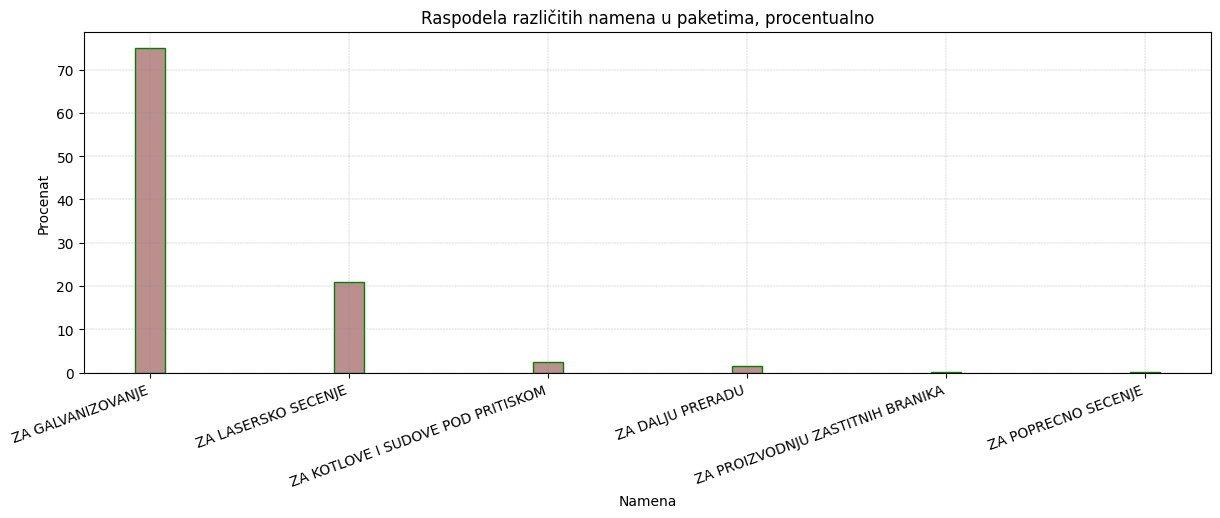

<Figure size 640x480 with 0 Axes>

In [62]:
#SADA sledi obrada kolone "Namena"

doc.add_heading("5. Pregled rasporeda namena:", level = 2)

namena = df_mesecniMT['Namena'].value_counts()

labels_namene = []
procenti_namene = []
for naziv, vrednost in namena.items():
    procenat = round(vrednost / broj_redovaMT * 100, 2)
    labels_namene.append(naziv)
    procenti_namene.append(procenat)


#crta histagram
fig, ax = plt.subplots(figsize=(12, 4))
plt.tight_layout()
ax.grid(True, color = "grey", linewidth = "0.2", linestyle = "-.")

#tekst na y osi okrecem zato sto je predugacko pa se poklapaju reci...
ax.set_xticklabels(labels_namene, rotation = 20, ha = 'right')

plt.xlabel('Namena') 
plt.ylabel('Procenat') 
ax.set_title('Raspodela različitih namena u paketima, procentualno')

ax.bar(labels_namene, procenti_namene, width = 0.15, color = 'rosybrown', edgecolor = "green")

plt.show()

#---------------------------------------------------------------------------------------------------------------------------
plt.tight_layout()
#cuva grafik u fajl kao sliku
grafik4 = "RaspodeleNamene.png"
fig.savefig(grafik4, bbox_inches="tight")  #drugi argument govori da treba da ukljuci i margine grafika - nazive x i y osa

#onda unosimo sliku grafika u dokument izvestaja
doc.add_picture(grafik4, width = Inches(6.5))

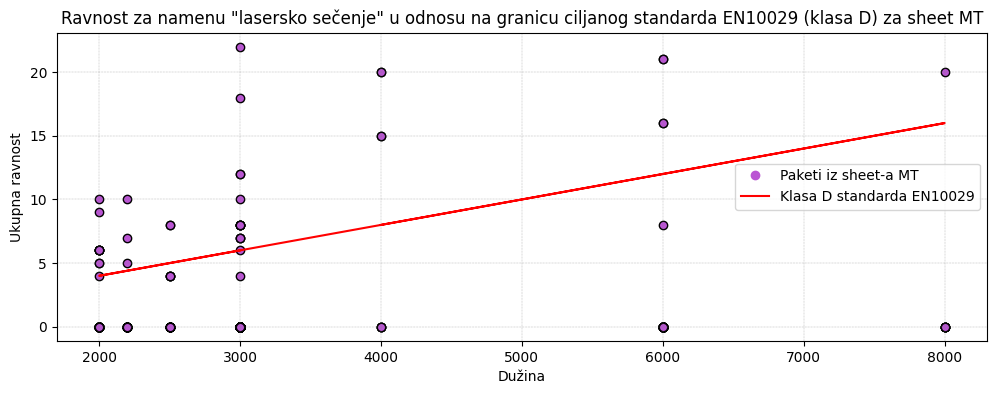

<Figure size 640x480 with 0 Axes>

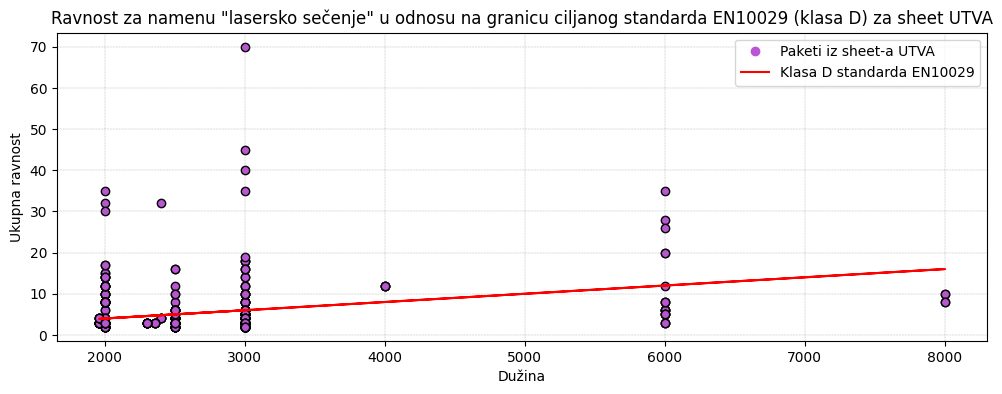

<Figure size 640x480 with 0 Axes>

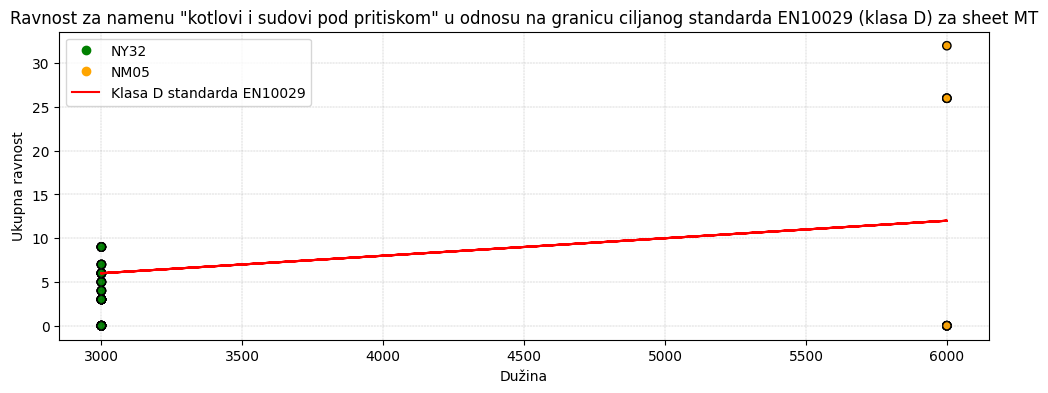

<Figure size 640x480 with 0 Axes>

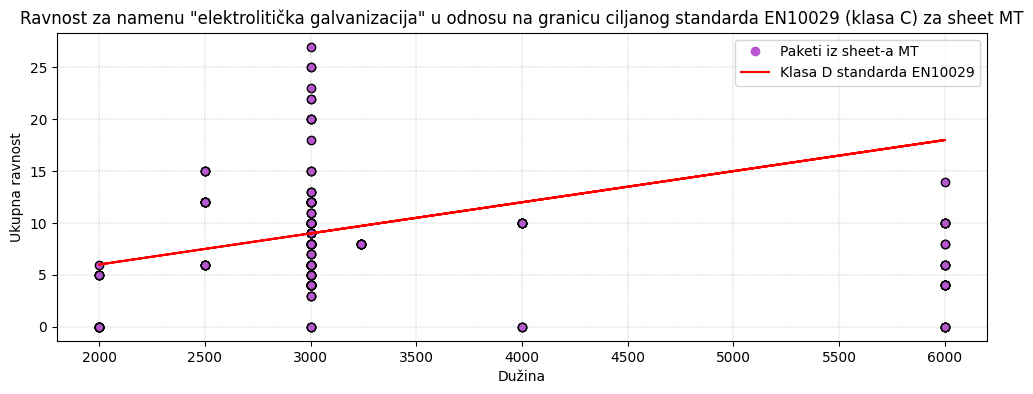

<Figure size 640x480 with 0 Axes>

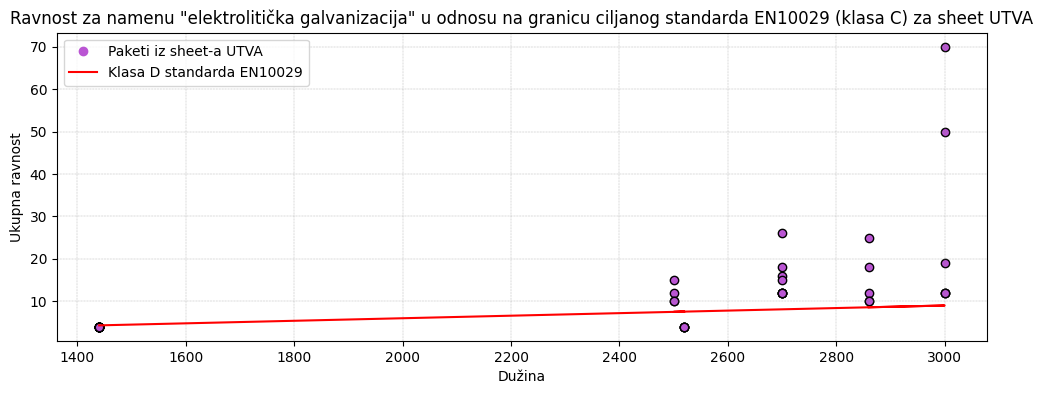

<Figure size 640x480 with 0 Axes>

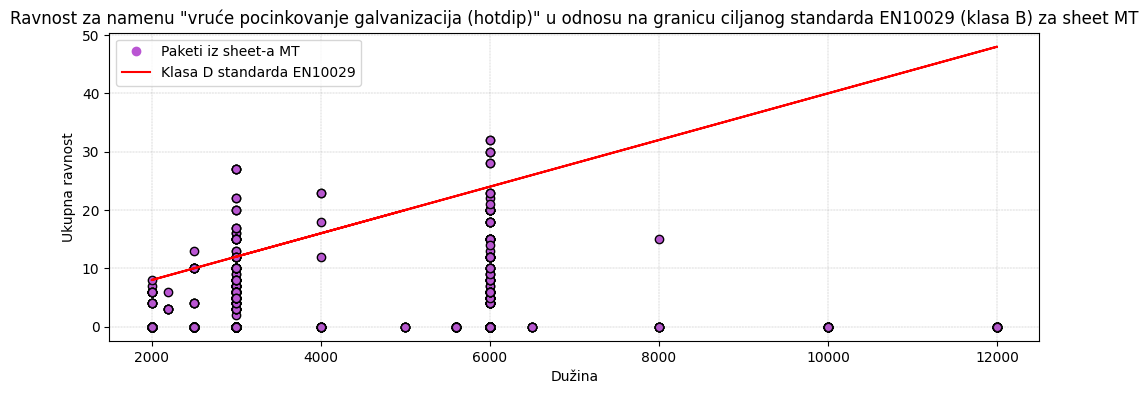

<Figure size 640x480 with 0 Axes>

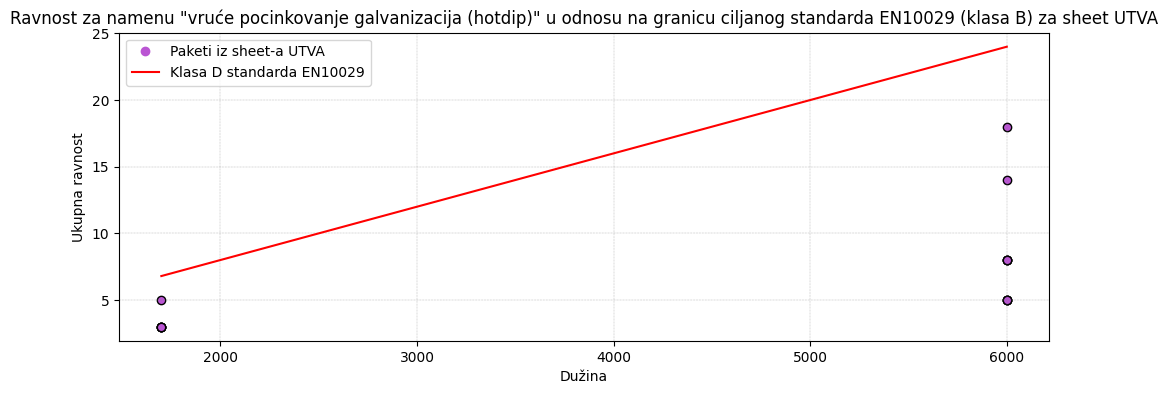

<Figure size 640x480 with 0 Axes>

In [63]:
#Sada sledi analiza laserskog secenja za debljine <= 10mm koje su definisane standardom #EN10029 (klasa D)
#radicemo za MT sheet, i za UTVA sheet samo za TTA
doc.add_heading("5. Pregled kvaliteta čelika sa aspekta namene:", level = 2)

#---------------------------------------------------------------------------------------------------------------------------
#### PRAVE SE GRAFICI SCATTER PLOT ####
#---------------------------------------------------------------------------------------------------------------------------
#IMACEMO RAZLICITE PODATKE - IZ SHEET-A MT IMAMO ZA LASERKSKO SECENJE, ZA KOTLOVE ITD... 
#I IZ SHEET-A UTVA IMACEMO DEO ZA LASERSKO SECENJE
#PRINCIP RACUNA -> GRANICE DOZVOLJENOSTI ZA RAVNOST I SL. SU ISTE TAKO DA KORISTIM PETLJU MALO 
#VESTACKI NAPRAVLJENU (BROJI OD 1 DO NA PRIMER 3...) I REDOM ZA TE PODATKE CRTAM SCATTER PLOT                                                     

#za Lasersko secenje MT
#u petlji broj 1
samo_lasersko_MT = df_mesecniMT[df_mesecniMT['Namena'] == 'ZA LASERSKO SECENJE']

#za lasersko secenje UTVA
#2
samo_lasersko_UTVA = df_mesecniUTVA[df_mesecniUTVA['Namena'] == 'ZA LASERSKO SECENJE']
samo_lasersko_UTVA = samo_lasersko_UTVA[samo_lasersko_UTVA['Vrsta proizvoda'] == 'TTA']

#za sudove pod pritiskom MT
#3
samo_kotlovi_MT = df_mesecniMT[df_mesecniMT['Namena'] == 'ZA KOTLOVE I SUDOVE POD PRITISKOM']

#4 i 6
#za galvanizaciju za MT
samo_galvanizacija_MT = df_mesecniMT[df_mesecniMT['Namena'] == 'ZA GALVANIZOVANJE']

#5 i 7
#za galvanizaciju za UTVA
samo_galvanizacija_UTVA = df_mesecniUTVA[df_mesecniUTVA['Namena'] == 'ZA GALVANIZOVANJE']
samo_galvanizacija_UTVA = samo_galvanizacija_UTVA[samo_galvanizacija_UTVA['Vrsta proizvoda'] == 'TTA']

#---------------------------------------------------------------------------------------------------------------------------
doc.add_paragraph("Klasa D je najstroža klasa ravnosti definisana standardom EN10029. Namenjena je za aplikacije koje zahtevaju visoku preciznost i minimalna odstupanja u ravnosti, kao sto je lasersko sečenje.")
doc.add_paragraph("Graficima ispod su obuhvaćeni svi kvaliteti čelika i sve širine čelika. Širina čelika je bitna samo kao dimenziona mogućnost obrade sa aspekta korisnika.")
doc.add_paragraph("Glava lasera mora da održava konstantnu udaljenost od površine lima za precizno fokusiranje snopa. Ako je lim neravan glava će se nepravilno prilagodjavati sto može izazvati promene u fokusu. Sistem za praćenje visine se oslanja na senzor koji prati razmak izmedju glave lasera i površine lima.Kod neravnih limova, senzor mora često da prilagođava visinu, što može izazvati kašnjenja i nepravilno rezanje. Refleksije lasera sa neravne površine mogu uzrokovati povratne efekte na optički sistem.")
doc.add_paragraph("Proizvođači opreme (npr. Bystronic, Trumpf i Mazak) često zahtevaju tolerancije u skladu sa klasom D.")
#---------------------------------------------------------------------------------------------------------------------------

#SADA CEMO U PETLJI DA PRODJEMO I NACRTAMO GRAFIK I ZA MT I ZA UTVA
koji_grafik_crtam = [1, 2, 3, 4, 5, 6, 7]
#---------------------------------------------------------------------------------------------------------------------------

for koji_gr in koji_grafik_crtam:
    if koji_gr == 1:
        odgovarajuci_podaci = samo_lasersko_MT[samo_lasersko_MT['Debljina'] <= 10]
        naslov = "lasersko sečenje"
        naziv_sheeta = 'MT'
        klasa = 'klasa D' 
        debljinaText = 'do 10mm'
        
    elif koji_gr == 2:
        odgovarajuci_podaci = samo_lasersko_UTVA[samo_lasersko_UTVA['Debljina'] <= 10]
        naslov = "lasersko sečenje"
        naziv_sheeta = 'UTVA'
        klasa = 'klasa D' 
        debljinaText = 'do 10mm'
        
    elif koji_gr == 3:
        odgovarajuci_podaci = samo_kotlovi_MT[samo_kotlovi_MT['Debljina'] <= 10]
        naslov = "kotlovi i sudovi pod pritiskom"
        naziv_sheeta = 'MT'
        klasa = 'klasa D' 
        debljinaText = 'do 10mm'

    elif koji_gr == 4:
        odgovarajuci_podaci = samo_galvanizacija_MT[samo_galvanizacija_MT['Debljina'] <= 3]
        naslov = "elektrolitička galvanizacija"
        naziv_sheeta = 'MT'
        klasa = 'klasa C' 
        debljinaText = 'do 3mm'

    elif koji_gr == 5:
        odgovarajuci_podaci = samo_galvanizacija_UTVA[samo_galvanizacija_UTVA['Debljina'] <= 3]
        naslov = "elektrolitička galvanizacija"
        naziv_sheeta = 'UTVA'
        klasa = 'klasa C' 
        debljinaText = 'do 3mm'

    elif koji_gr == 6:
        odgovarajuci_podaci = samo_galvanizacija_MT[samo_galvanizacija_MT['Debljina'] > 3]
        naslov = "vruće pocinkovanje galvanizacija (hotdip)"
        naziv_sheeta = 'MT'
        klasa = 'klasa B' 
        debljinaText = 'veće od 3mm'

    elif koji_gr == 7:
        odgovarajuci_podaci = samo_galvanizacija_UTVA[samo_galvanizacija_UTVA['Debljina'] > 3]
        naslov = "vruće pocinkovanje galvanizacija (hotdip)"
        naziv_sheeta = 'UTVA'
        klasa = 'klasa B' 
        debljinaText = 'veće od 3mm'
        
    else:
        odgovarajuci_podaci = []
        naziv_sheeta = 'nema'
        
    ukupno_odgovarajuci_podaci = len(odgovarajuci_podaci)
  
    #---------------------------------------------------------------------------------------------------------------------------
    #deo teksta koji se ispisuje za neke grafike
    if koji_gr == 3:
        doc.add_paragraph(f"• Ravnost ploča mora biti u skladu sa EN10029 (npr. klasa C ili D) kako bi se omogućilo pravilno zavarivanje i ravnomerno raspoređivanje naprezanja.")
        doc.add_paragraph(f"• P265GH je najčesće korišćen čelik za kotlove i sudove pod pritiskom prema standardima EN10028-2.")
        doc.add_paragraph(f"• Ravne ploče osiguravaju ravnomernu raspodelu opterećenja dok neravni limovi otežavaju valjanje i savijanje u cilindre.")
   
    if koji_gr == 4: #or koji_gr == 5:  -> hocu da pise samo ispred MT a odnosi se naravno i na utva
        doc.add_paragraph(f"• Analizom je obuhvaćena standardna praksa korišćenja elektrolitičke galvanizacije za limove debljine <= 3mm. Moguće je korišćenje elektrolitičke galvanizacije za oblast 3mm-4mm ali se ona tada koristi u specijalnim situacijama i zbog toga je isključena iz ovog generalnog koncepta.")             
        doc.add_paragraph(f"• U slučaju tanjih limova, debljina ovde razmatranih, sloj cinka je debljine 5-30μm. Veće debljine limova povećavaju otpor u elektrolitičkoj ćeliji, čime postaje teže ravnomerno nanositi sloj cinka. Tanji limovi omogućavaju stabilniji protok električne struje u elektrolitičkoj ćeliji, što osigurava ravnomerno nanošenje sloja cinka. Kod neravnih tabli, udaljenost između katode (čelik) i anode (elektroda) varira, što uzrokuje promene u jačini električnog polja (različita gustina struje). Ravnost je od kritične vaznosti jer sloj cinka moze biti veći na bregovima nego u udubljenjima gde je taloženje neefikasno. ") 
        doc.add_paragraph(f"• Automobilska industrija zahteva strožiju klasu D u odnosu na razmatranu klasu C u okviru narednih grafika.") 

    if koji_gr == 6: #or koji_gr == 7:  -> hocu da pise samo ispred MT a odnosi se naravno i na utva
        doc.add_paragraph(f"• Analizom su obuhvaćeni paketi debljine veće od 3mm usled dodatnih naprezanja koja mogu nastati uranjanjem tabli u rastopljeni cink temperature 450° C (ne koristi se kod debljina manjih od 3mm). Cink reaguje sa čelikom i formira slojeve legura Fe-Zn na površini. Na površini se formira sloj cinka debljine 50μm-200μm koji pruža trajnu zaštitu kod kritičnih primena. Fokus je na otpornosti na koroziju, pa su zahtevi za ravnost fleksibilniji.")
        doc.add_paragraph(f"• Analizom nije obuhvaćeno prisustvo ljuspi koje otežavaju galvanizaciju već samo ravnost koja je od sekundardnog značaja kod ovog tipa (ciljana klasa B).")
        doc.add_paragraph(f"• Savremena postojenja za galvanizaciju obrađuju table dužine do 12m tako da je razmatran ceo dimenzioni asortiman HBIS-a.")

    
    doc.add_paragraph(f"Na sledećem grafiku, za sheet {naziv_sheeta}, prikazana je analiza namene \"{naslov}\" za debljine {debljinaText} ({ukupno_odgovarajuci_podaci} paketa), posmatrani na osnovu ciljanog standarda EN10029 ({klasa}).")
    
    #podaci za scatter plot
    duzina = odgovarajuci_podaci['Duzina']
    ukupna_ravnost = odgovarajuci_podaci['Ukupna ravnost']

    #granica za kupce je 2mm, 3 ili 4... po metru. Posto je duzina u mm, onda racunamo za razlicite duzine razlicite odgovarajuce granice dozvoljene ravnosti
    if koji_gr in [1, 2, 3]:
        granica_za_kupce = duzina / 1000 * 2 
    elif koji_gr in [4, 5]:
        granica_za_kupce = duzina / 1000 * 3
    elif koji_gr in [6, 7]:
        granica_za_kupce = duzina / 1000 * 4 
        
    
    #podaci za linijski grafik
    x = duzina
    y = granica_za_kupce
    
    #crtamo grafik
    fig, ax = plt.subplots(figsize=(12, 4))
    
    ax.grid(True, color = "grey", linewidth = "0.2", linestyle = "-.")
    
    plt.xlabel('Dužina') 
    plt.ylabel('Ukupna ravnost') 
    ax.set_title(f'Ravnost za namenu \"{naslov}\" u odnosu na granicu ciljanog standarda EN10029 ({klasa}) za sheet {naziv_sheeta}')

    
    #BOJE ZA GRAFIK, AKO JE ZA KOTLOVE ONDA CU KORISTITI DVE BOJE 
    #I PRAVIM LEGENDU

    #ovo su kotlovi
    if koji_gr == 3:
        #boje
        interni_kvalitet = odgovarajuci_podaci['Interni kvalitet']
        uslovi = [
            interni_kvalitet == 'NY32', 
            interni_kvalitet == 'NM05'
        ]
        izbor_boje = ['green', 'orange']
        boja = numpy.select(uslovi, izbor_boje, default = 'black')

        #legenda
        green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=6, label='NY32')
        orange_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=6, label='NM05')
        line_handle = mlines.Line2D([], [], color='red', marker = None, label='Klasa D standarda EN10029')
        plt.legend(handles = [green_dot, orange_dot, line_handle])
        
    else:
        #boja
        boja = 'mediumorchid'  
        #legenda
        mediumorchid_dot = mlines.Line2D([], [], color='mediumorchid', marker='o', linestyle='None', 
                                         markersize=6, label = f"Paketi iz sheet-a {naziv_sheeta}")
        line_handle = mlines.Line2D([], [], color='red', marker = None, label='Klasa D standarda EN10029')
        plt.legend(handles = [mediumorchid_dot, line_handle])


    ax.scatter(duzina, ukupna_ravnost, color = boja, edgecolor = "black")
    ax.plot(x, y, color = 'red')
    
    plt.show()
    
    #---------------------------------------------------------------------------------------------------------------------------
    plt.tight_layout()
    #cuva grafik u fajl kao sliku
    grafik5 = f"GrafikNamene{koji_gr}.png"
    fig.savefig(grafik5, bbox_inches = "tight")  #drugi argument govori da treba da ukljuci i margine grafika - nazive x i y osa
    
    #onda unosimo sliku grafika u dokument izvestaja
    doc.add_picture(grafik5, width = Inches(6.5))
    
    #---------------------------------------------------------------------------------------------------------------------------    

    #Sada razmatramo koliko procenata zadovoljava dozvoljenu ravnost, standard EN10029, i koliko njih ne zadovoljava
    dozvoljena_ravnost = odgovarajuci_podaci['Dozvoljena ravnost']
    ne_zadovoljava = (ukupna_ravnost > dozvoljena_ravnost).sum()
    rezultat = doc.add_paragraph(f"Broj paketa koji ne zadovoljavaju naš interni standard: ")
    #ovo se koristi za bojenje dela teksta
    run = rezultat.add_run(f"{ne_zadovoljava} ({round(ne_zadovoljava / ukupno_odgovarajuci_podaci * 100, 2)}%).")
    run.font.color.rgb = RGBColor(255, 0, 0)
    
    ne_zadovoljava_kupce = (ukupna_ravnost > granica_za_kupce).sum()
    rezultat = doc.add_paragraph(f"Broj paketa koji predstavljaju sivu zonu - ne ispunjavaju ciljani standard. Siva zona predstavlja oblast mogućih poboljšanja i približavanje idealnom odnosu sa kupcima:")
    run = rezultat.add_run(f"{ne_zadovoljava_kupce} ({round(ne_zadovoljava_kupce / ukupno_odgovarajuci_podaci * 100, 2)}%).")
    run.font.color.rgb = RGBColor(69, 69, 69)
    
    zadovoljava = (ukupna_ravnost <= granica_za_kupce).sum()
    rezultat = doc.add_paragraph(f"Broj paketa koji zadovoljavaju obe perspektive: ")
    run = rezultat.add_run(f"{zadovoljava} ({round(zadovoljava / ukupno_odgovarajuci_podaci * 100, 2)}%).")
    run.font.color.rgb = RGBColor(0, 153, 0)
    
    #mesto za komentar koji se rucno unosi u word-u
    run_bold = doc.add_paragraph().add_run(f"KOMENTAR 1: ")
    run_bold.bold = True
    run_bold.font.size = Inches(0.2)

C:\Users\Bozinovic\AppData\Local\Temp\ipykernel_15196\1060903067.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kvaliteti_S235_MT["Izvor"] = "MT"
C:\Users\Bozinovic\AppData\Local\Temp\ipykernel_15196\1060903067.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kvaliteti_S235_UTVA["Izvor"] = "UTVA"
C:\Users\Bozinovic\AppData\Local\Temp\ipykernel_15196\1060903067.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

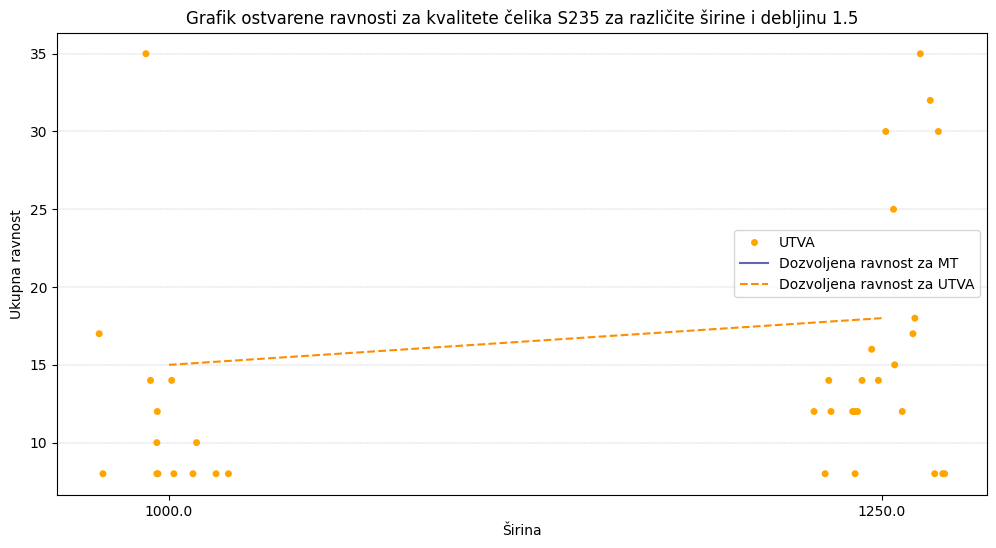

<Figure size 640x480 with 0 Axes>

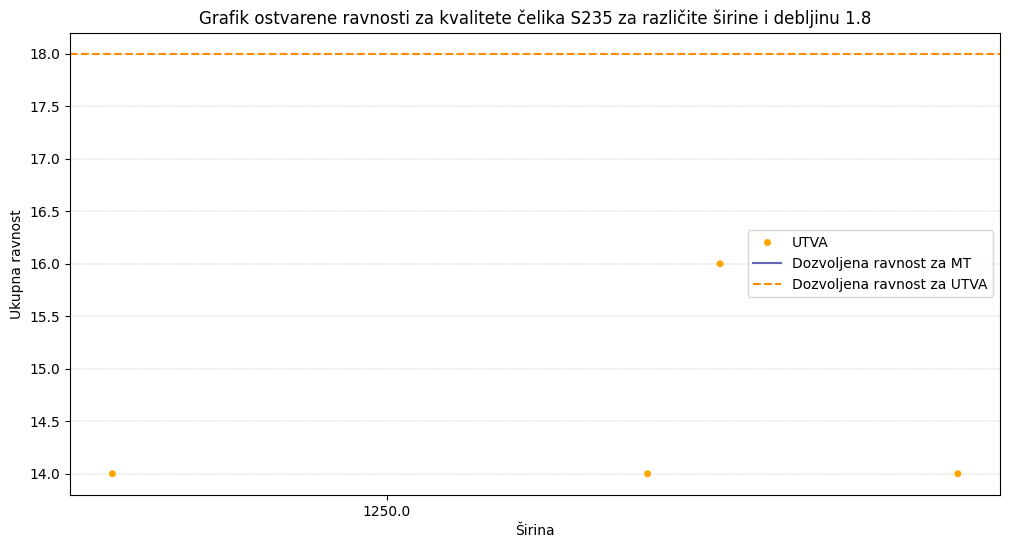

<Figure size 640x480 with 0 Axes>

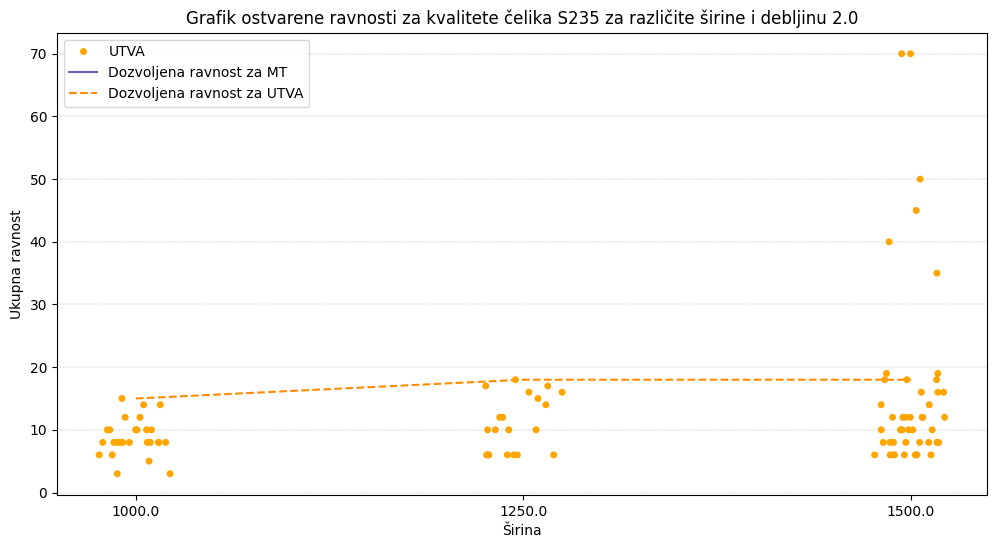

<Figure size 640x480 with 0 Axes>

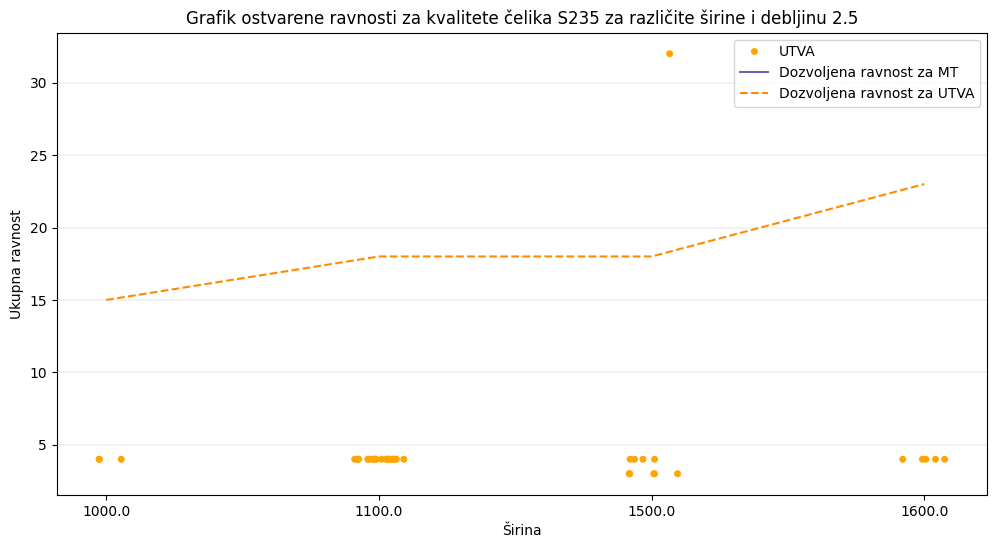

<Figure size 640x480 with 0 Axes>

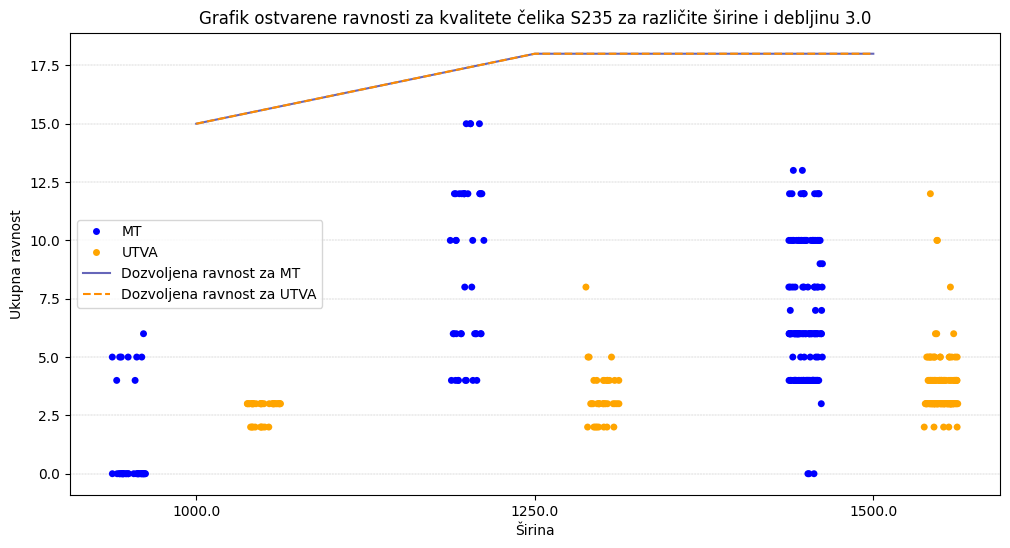

<Figure size 640x480 with 0 Axes>

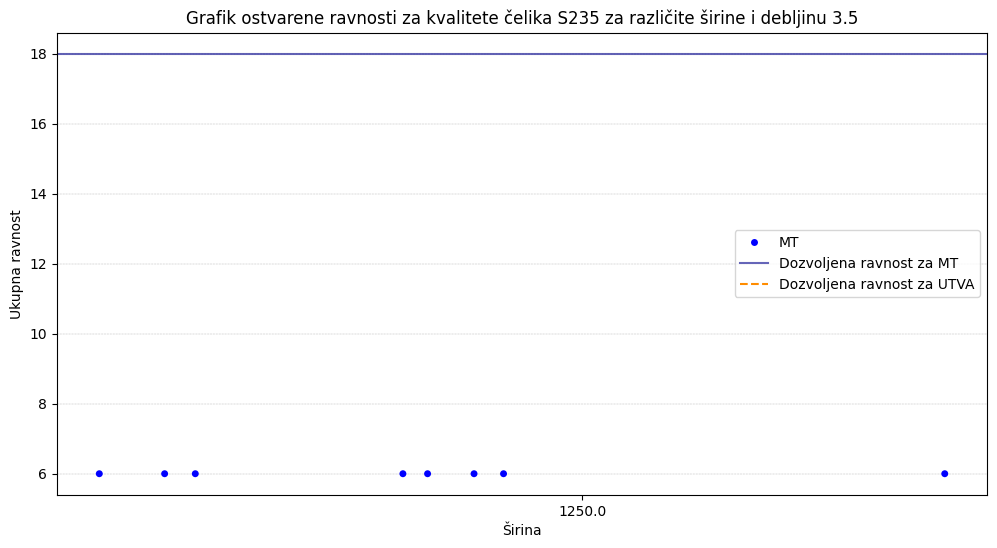

<Figure size 640x480 with 0 Axes>

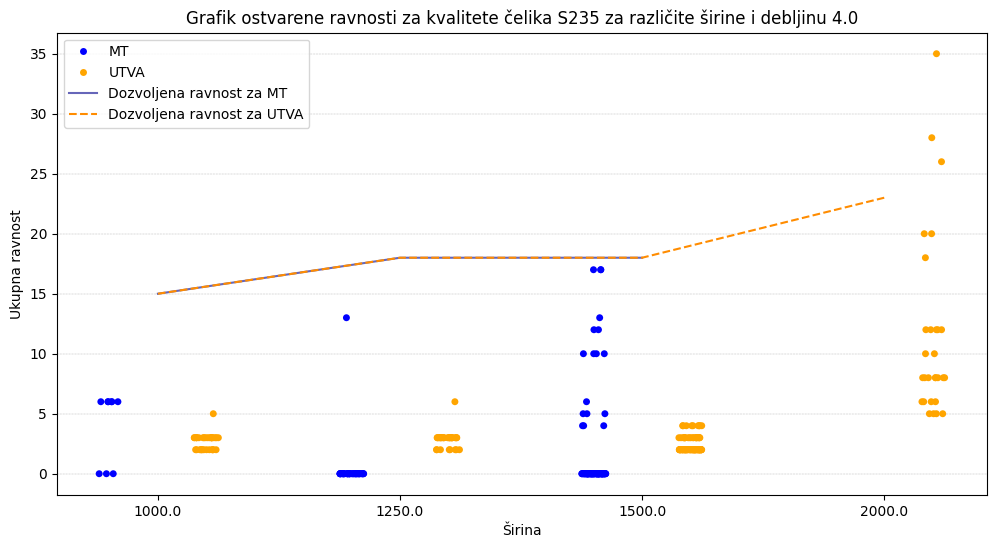

<Figure size 640x480 with 0 Axes>

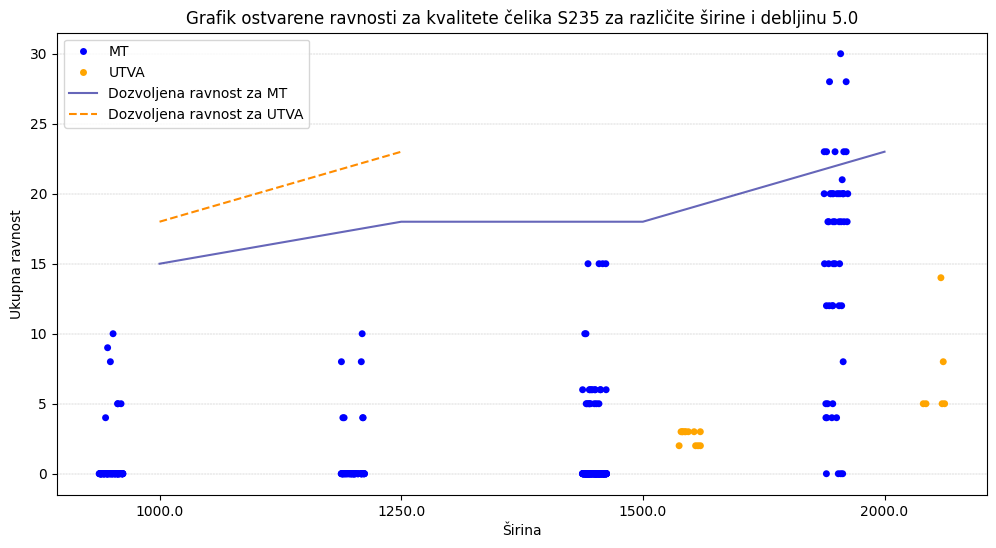

<Figure size 640x480 with 0 Axes>

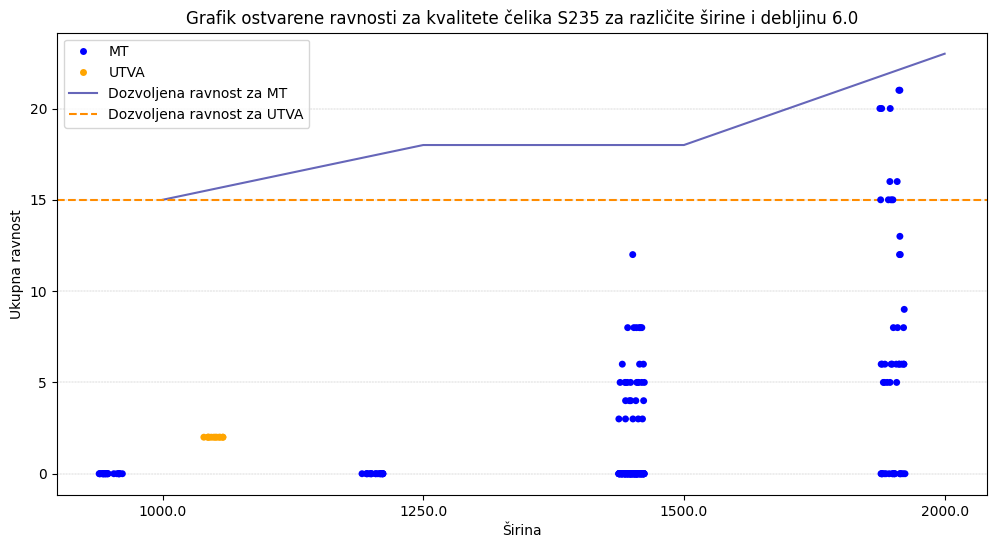

<Figure size 640x480 with 0 Axes>

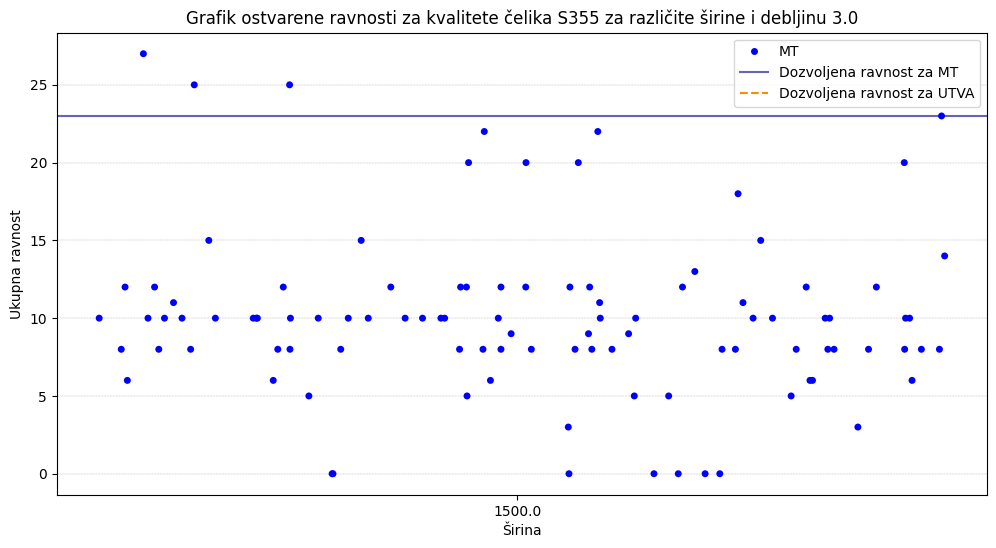

<Figure size 640x480 with 0 Axes>

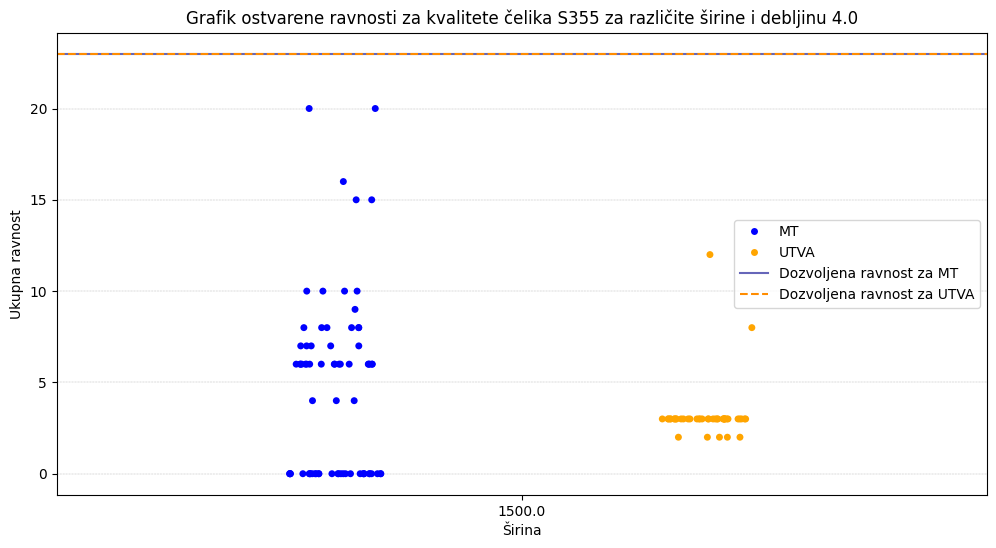

<Figure size 640x480 with 0 Axes>

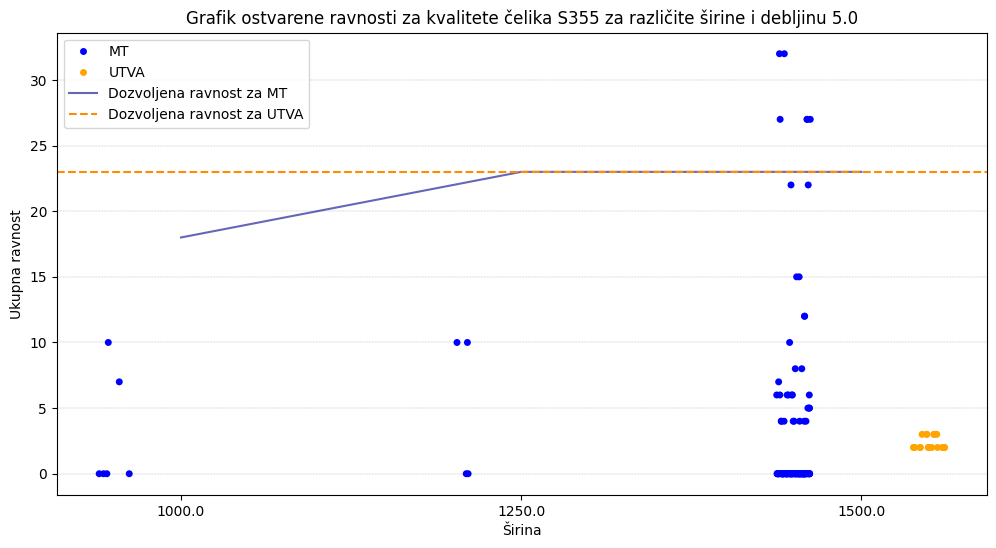

<Figure size 640x480 with 0 Axes>

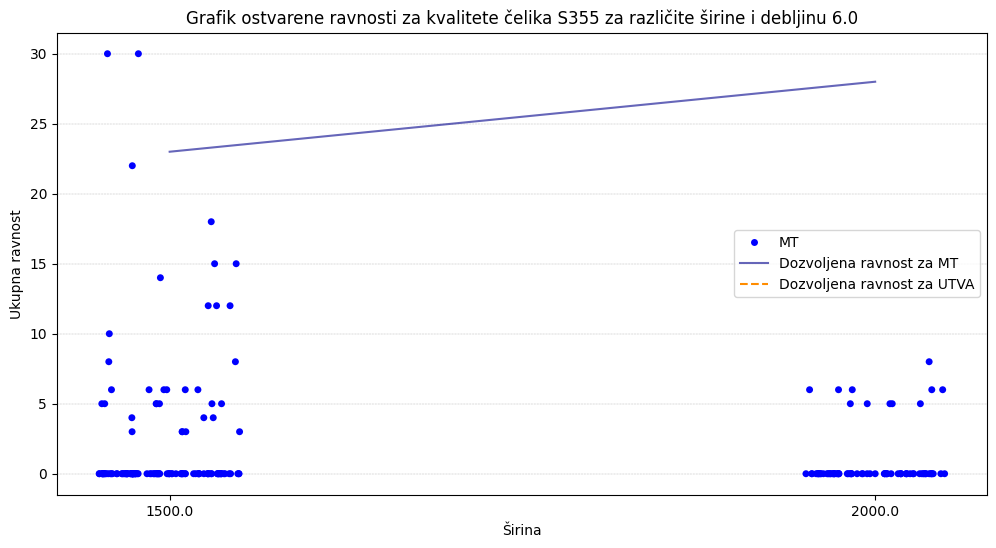

<Figure size 640x480 with 0 Axes>

In [67]:
#ovde cu probati da spojim MT i UTVA za ove grafike iznad
#Prikazivanje grafika za kriticne vrednosti za MT i UTVA
doc.add_heading("6. Analiza kritičnih dimenzija:", level = 2)

doc.add_paragraph(f"Analiza je rađena na osnovu standarda EN10051 koji predstavlja dobar izbor sa aspekta proizvodnje širokog asortimana i dimenzija proizvoda.")

#--------------------------------------------------------------------------------------------------------------------------- 
kvaliteti_MT =  df_mesecniMT[df_mesecniMT['Debljina'] <= 6]
kvaliteti_UTVA = df_mesecniUTVA[df_mesecniUTVA['Debljina'] <= 6]

#  S235

kvaliteti_S235_MT = kvaliteti_MT[kvaliteti_MT['Kvalitet'].str.startswith('S235')]
kvaliteti_S235_UTVA = kvaliteti_UTVA[kvaliteti_UTVA['Kvalitet'].str.startswith('S235')]
kvaliteti_S235_MT["Izvor"] = "MT"
kvaliteti_S235_UTVA["Izvor"] = "UTVA"

broj_S234_MT = len(kvaliteti_S235_MT)
broj_S234_UTVA = len(kvaliteti_S235_UTVA)

#  S355

kvaliteti_S355_MT = kvaliteti_MT[kvaliteti_MT['Kvalitet'].str.startswith('S355')]
kvaliteti_S355_UTVA = kvaliteti_UTVA[kvaliteti_UTVA['Kvalitet'].str.startswith('S355')]
kvaliteti_S355_MT["Izvor"] = "MT"
kvaliteti_S355_UTVA["Izvor"] = "UTVA"

broj_S355_MT = len(kvaliteti_S355_MT)
broj_S355_UTVA = len(kvaliteti_S355_UTVA)
#---------------------------------------------------------------------------------------------------------------------------
"""
#Informacije koje dozvoljene ravnosti imaju kvaliteti S235 i S355 za odredjene sirine

S235 svi tipovi - sirina <1200 - 15 dozvoljena
siina 1200 <= 1500 - 18
veca od 1500 sirina - 23

S355 - sirina manja od 1200 - 18 dozvoljena
1200 <= 1500  -  23
veca od 1500  - 28
"""
#--------------------------------------------------------------------------------------------------------------------------- 

#Sada pravim grafike prvo za S235 pa S355
kvaliteti_grafik = ['S235', 'S355']

for kv in kvaliteti_grafik:

    #sa kojim podacima radim i spajam podatke iz MT i UTVA da bih crtala podatke na istom grafiku za razlicite debljine
    if kv == 'S235':
        doc.add_paragraph(f"Slede grafici odnosa ostvarene i dozvoljene ravnosti za konstruktivni čelik S235 (svi tipovi) za kritične dimenzije.")
        spojeni_podaci_MT_UTVA = pd.concat([kvaliteti_S235_MT, kvaliteti_S235_UTVA], ignore_index = True)
    else: #S355
        doc.add_paragraph(f"Slede grafici odnosa ostvarene i dozvoljene ravnosti za termotehnički čelik S355 (svi tipovi) za kritične dimenzije.")
        spojeni_podaci_MT_UTVA = pd.concat([kvaliteti_S355_MT, kvaliteti_S355_UTVA], ignore_index = True)
        
    
    #crtamo grafike
    jedinstvene_debljine = sorted(spojeni_podaci_MT_UTVA["Debljina"].unique())
    
    for deb in jedinstvene_debljine:
        filtrirani_podaci = spojeni_podaci_MT_UTVA[spojeni_podaci_MT_UTVA["Debljina"] == deb]
    
        # Kreiraj novi plot za datu debljinu
        fig, ax = plt.subplots(figsize=(12,6))
    
        ax.grid(True, color = "grey", linewidth = "0.2", linestyle = "-.")
        
        # Scatter - x = Ukupna_ravnost, y = Sirina
        # Koristi "Skup" kao 'hue' (različite boje po skupu) ili 'style'
        sns.stripplot(data = filtrirani_podaci, x = "Sirina", y = "Ukupna ravnost",
            hue = "Izvor",           # razlikuje podatke iz df1 i df2
            dodge = True,               # KLJUČNA OPCIJA: pomera tačke u stranu
            jitter = True,              # malo razbaca tačke
            size = 5,                    # veličina markera
            palette = {
                "MT": "blue",         # Ako je Izvor == "MT", oboji plavo
                "UTVA": "orange",      # Ako je Izvor == "UTVA", oboji narandžasto
            }, 
            ax = ax
        )
    
        #--------------------------------------------------------------------------------------------------------------------------- 
        #za plot dozvoljene ravnosti potrebne su mi distinct kombinacije sirine i dozvoljene ravnosti 
        #crtam dva plot-a, prvi je MT, drugi UTVA
        for i in [1, 2]:
            if i == 1:
                izvor = 'MT'
                bojaZaPlot = 'darkblue'
                linestyle = '-'
                alpha = 0.6   #koliko da bude opacity
                label = 'Dozvoljena ravnost za MT'
            else:
                izvor = 'UTVA'
                bojaZaPlot = 'darkorange'
                linestyle = '--'
                alpha = 1
                label = 'Dozvoljena ravnost za UTVA'
    
                
            za_plot = filtrirani_podaci[filtrirani_podaci['Izvor'] == izvor]
            
            distinct_za_dozvoljenu = pd.DataFrame({'Sirina': za_plot['Sirina'], 'Dozvoljena': za_plot['Dozvoljena ravnost']}).drop_duplicates()
            distinct_za_dozvoljenu.sort_values(by = 'Sirina', inplace = True)
            sirine_uredene = sorted(za_plot['Sirina'].unique())
        
            #sada mapiram numericku x osu za plot, u odnosu na uredjene sirine 
            index_map = {val: i for i, val in enumerate(sirine_uredene)}
            x_plot = [index_map[s] for s in sirine_uredene]
        
            if len(distinct_za_dozvoljenu) == 1:
                #ako ima samo jednu stavku na x osi ne mogu da crtam liniju za dozvoljenu ravnost, mogu da stavim tacku
                plt.axhline(y = int(distinct_za_dozvoljenu['Dozvoljena'].iloc[0]), color = bojaZaPlot, linestyle = linestyle, alpha = alpha, label = label)
            else: 
                ax.plot(x_plot, distinct_za_dozvoljenu['Dozvoljena'], color = bojaZaPlot, linestyle = linestyle, alpha = alpha, label = label)
        #--------------------------------------------------------------------------------------------------------------------------- 
        # Daj naslov grafiku
        ax.legend()
        ax.set_title(f"Grafik ostvarene ravnosti za kvalitete čelika {kv} za različite širine i debljinu {deb}")
        ax.set_xlabel("Širina")
        ax.set_ylabel("Ukupna ravnost")
        
        plt.show()
    
        #---------------------------------------------------------------------------------------------------------------------------
        plt.tight_layout()
        #cuva grafik u fajl kao sliku
        grafik6 = f"GrafikDebljine{deb}.png"
        fig.savefig(grafik6, bbox_inches = "tight")  #drugi argument govori da treba da ukljuci i margine grafika - nazive x i y osa
        
        #onda unosimo sliku grafika u dokument izvestaja
        doc.add_picture(grafik6, width = Inches(6.5))
        

In [65]:
# Broj BLOKIRANIH paketa  
napomene_MT = df_mesecniMT['Napomene']
napomene_UTVA = df_mesecniUTVA['Napomene'] 

#Gledamo podatke i iz MT i iz UTVA
#Paket je blokiran ako u napomeni pise '\2a' ili '\1b', kreiracemo f-ju koja filtrira

#  MT
mask_ima_2a_ili_1b = df_mesecniMT['Napomene'].str.contains(r"/2a|/1b", case=False, na=False)
blokirani_MT = df_mesecniMT[mask_ima_2a_ili_1b]
broj_blokiranih_MT = len(blokirani_MT)
proc_broj_blokiranih_MT = round(broj_blokiranih_MT * 100 / broj_redovaMT, 2)

#  UTVA
mask_ima_2a_ili_1b = df_mesecniUTVA['Napomene'].str.contains(r"/2a|/1b", case=False, na=False)
blokirani_UTVA = df_mesecniUTVA[mask_ima_2a_ili_1b]
blokirani_UTVA = blokirani_UTVA[blokirani_UTVA['Vrsta proizvoda'] == 'TTA']
broj_blokiranih_UTVA = len(blokirani_UTVA)
proc_broj_blokiranih_UTVA = round(broj_blokiranih_UTVA * 100 / broj_redovaUTVA, 2)

#---------------------------------------------------------------------------------------------------------------------------    
doc.add_heading("7. Blokirani paketi:", level = 2)
doc.add_paragraph(f"Broj blokiranih paketa u MT je {broj_blokiranih_MT} ({proc_broj_blokiranih_MT}%), dok je u UTVA {broj_blokiranih_UTVA} ({proc_broj_blokiranih_UTVA}%).")
#---------------------------------------------------------------------------------------------------------------------------    
#prikazujemo koliko ih ima u kojoj debljini, sirini...
#kombinacija_MT = blokirani_MT.value_counts(subset = [blokirani_MT['Debljina'], blokirani_MT['Sirina']])
#kombinacije_UTVA = blokirani_UTVA.value_counts(subset = [blokirani_UTVA['Debljina'], blokirani_UTVA['Sirina']])
#---------------------------------------------------------------------------------------------------------------------------    

#moj muz me muci da mu izvadim: 
#Hoce da za datu kombinaciju debljine i sirine prikazem koje tacno rolne imaju gresku sa tim debljinama i sirinama (kolona TTR) i 
#koje tacno su greske (203/2a i slicno)

# 1) Iz jedne vrednosti (string) napomena, izvadi sve token-e (razdvojene ';') koji sadrže '/2a' ili '/1b'
# i vrati ih kao set (bez duplikata).
def extract_greske_jedan_red(napomena):
    if pd.isna(napomena):
        return set()
    tokens = [s.strip() for s in str(napomena).split(';')]
    rezultat = set()
    for t in tokens:
        low = t.lower()
        if '/2a' in low or '/1b' in low:
            rezultat.add(t.strip())
    return rezultat
    
# 2) Funkcija za celu grupu (sakupi sve greške u 1 string)
def sakupi_sve_greske(serija_napomena):
    sve_greske = set()
    for nap in serija_napomena:
        sve_greske |= extract_greske_jedan_red(nap)  # unija skupova
    return ", ".join(sorted(sve_greske)) if sve_greske else ""

#---------------------------------------------------------------------------------------------------------------------------    
#  Grupisanje za date debljine i sirine za MT
agregirani_podaci_MT = (
    blokirani_MT.groupby(["Debljina", "Sirina"])
        .agg(
            Broj_Blokiranih = ("Debljina", "size"),
            TTR_spisak = ("TTR", lambda s: ", ".join(map(str, s.unique()))),
            Greske = ("Napomene", sakupi_sve_greske),
        ).reset_index()
    )

#  Grupisanje za date debljine i sirine za UTVA
agregirani_podaci_UTVA = (
    blokirani_UTVA.groupby(["Debljina", "Sirina"])
        .agg(
            Broj_Blokiranih = ("Debljina", "size"),
            TTR_spisak = ("TTR", lambda s: ", ".join(map(str, s.unique()))),
            Greske = ("Napomene", sakupi_sve_greske),
        ).reset_index()
    )

#---------------------------------------------------------------------------------------------------------------------------    
#CRTAMO TABELE
#---------------------------------------------------------------------------------------------------------------------------    
#ZA MT TABELA
doc.add_paragraph(f"Na sledećoj tabeli prikazujemo broj blokiranih paketa za odgovarajuće debljine i širine, za MT.")

#Nacrtajmo tabelu
#jedan hered red - imena kolona i 5 kolone
table = doc.add_table(rows = 1, cols = 5)
#Neki primeri za izgled tabele: "LightShading-Accent1", "LightGrid", "ColorfulList-Accent1", "TableGrid", ...
table.style = "Colorful List Accent 2"

#nazivi kolona za tabelu koju cemo da prikazemo
#Popunjavanje imena kolona
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Debljina"
hdr_cells[1].text = "Sirina"
hdr_cells[2].text = "Broj blokiranih paketa"
hdr_cells[3].text = "TTR"
hdr_cells[4].text = "Greske"

#dodavanje podataka u tabelu u odgovarajucim kolonama i redovima
for red in agregirani_podaci_MT.itertuples():
    row_cells = table.add_row().cells
    row_cells[0].text = str(red.Debljina)
    row_cells[1].text = str(red.Sirina)
    row_cells[2].text = str(red.Broj_Blokiranih)
    row_cells[3].text = str(red.TTR_spisak)
    row_cells[4].text = str(red.Greske)

table.columns[0].width = Inches(1.5) 


#---------------------------------------------------------------------------------------------------------------------------    
#ZA UTVA TABELA
doc.add_paragraph(f"Takođe, pogledajmo broj blokiranih TTA paketa za odgovarajuće debljine i širine, za UTVA, na sledećoj tabeli.")

#Nacrtajmo tabelu
#jedan hered red - imena kolona i 5 kolone
table = doc.add_table(rows = 1, cols = 5)
#Neki primeri za izgled tabele: "LightShading-Accent1", "LightGrid", "ColorfulList-Accent1", "TableGrid", ...
table.style = "Colorful List Accent 1"

#nazivi kolona za tabelu koju cemo da prikazemo
#Popunjavanje imena kolona
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Debljina"
hdr_cells[1].text = "Širina"
hdr_cells[2].text = "Broj blokiranih paketa"
hdr_cells[3].text = "TTR"
hdr_cells[4].text = "Greške"

#dodavanje podataka u tabelu u odgovarajucim kolonama i redovima
for red in agregirani_podaci_UTVA.itertuples():
    row_cells = table.add_row().cells
    row_cells[0].text = str(red.Debljina)
    row_cells[1].text = str(red.Sirina)
    row_cells[2].text = str(red.Broj_Blokiranih)
    row_cells[3].text = str(red.TTR_spisak)
    row_cells[4].text = str(red.Greske)

table.columns[0].width = Inches(1.5) 


In [66]:
#Cuvanje izvestaja u fajlu
doc.save(ime_izvestaja)